### Project Corona dataset

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
#loading the dataset
df = pd.read_csv("corona.csv")

In [3]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [5]:
df.sample()

,Date,Country,Confirmed,Recovered,Deaths
17498,2020-04-24,Barbados,77,31,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [7]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [8]:
df.shape

(23688, 5)

In [9]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [10]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [11]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [12]:
df['Country'].value_counts()

Cote d'Ivoire            126
Burundi                  126
Saint Kitts and Nevis    126
Belarus                  126
Fiji                     126
                        ... 
Iceland                  126
Moldova                  126
Senegal                  126
Suriname                 126
Slovakia                 126
Name: Country, Length: 188, dtype: int64

In [13]:
df.groupby('Country').sum()

,Confirmed,Recovered,Deaths
Country,,,
Afghanistan,185236,20845,4669
Albania,41253,25688,1629
Algeria,240070,107345,23232
Andorra,41573,20751,2219
Angola,1892,506,131
...,...,...,...
West Bank and Gaza,19971,8798,113
Western Sahara,307,186,1
Yemen,2696,92,460


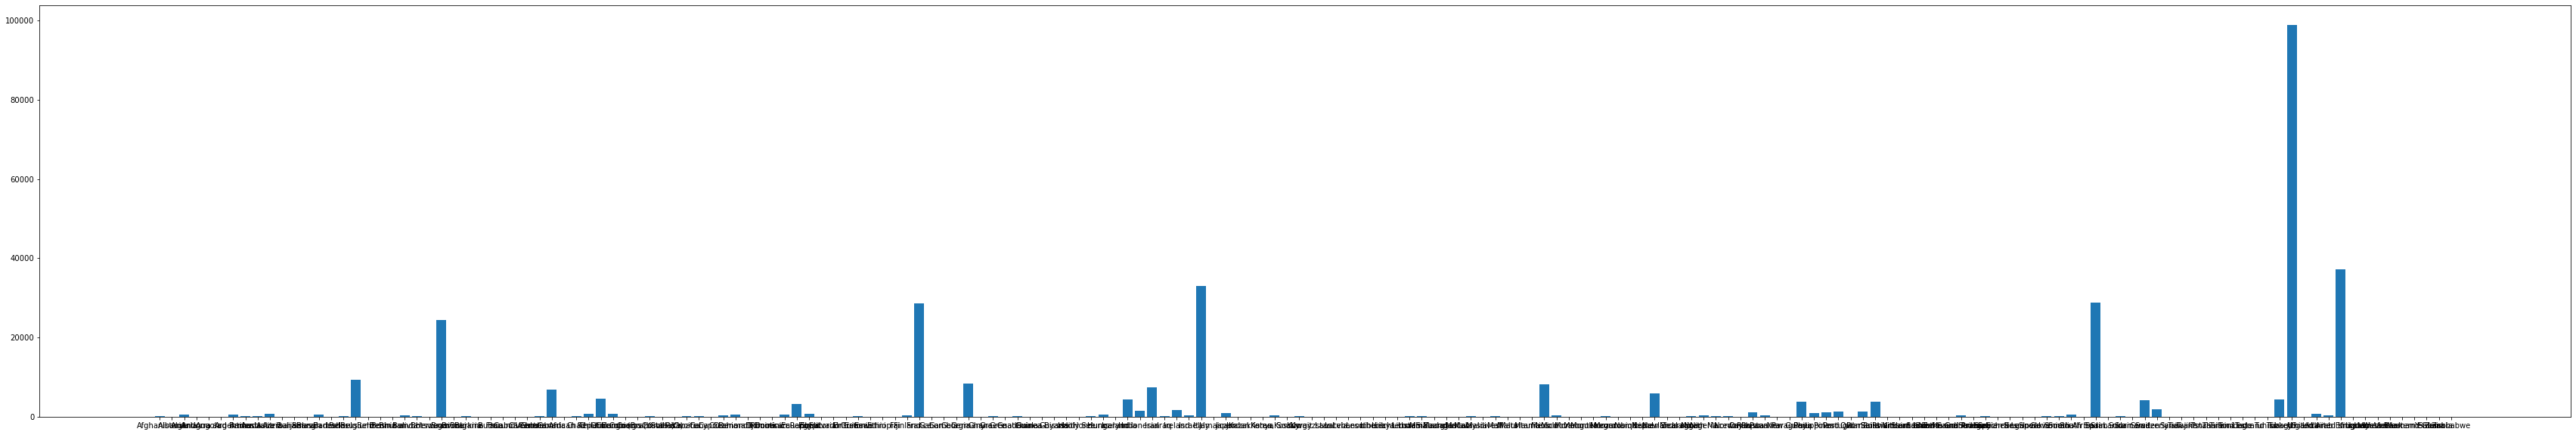

In [14]:
plt.figure(figsize=(60,10))
plt.bar(df['Country'],df['Deaths'])
plt.show()

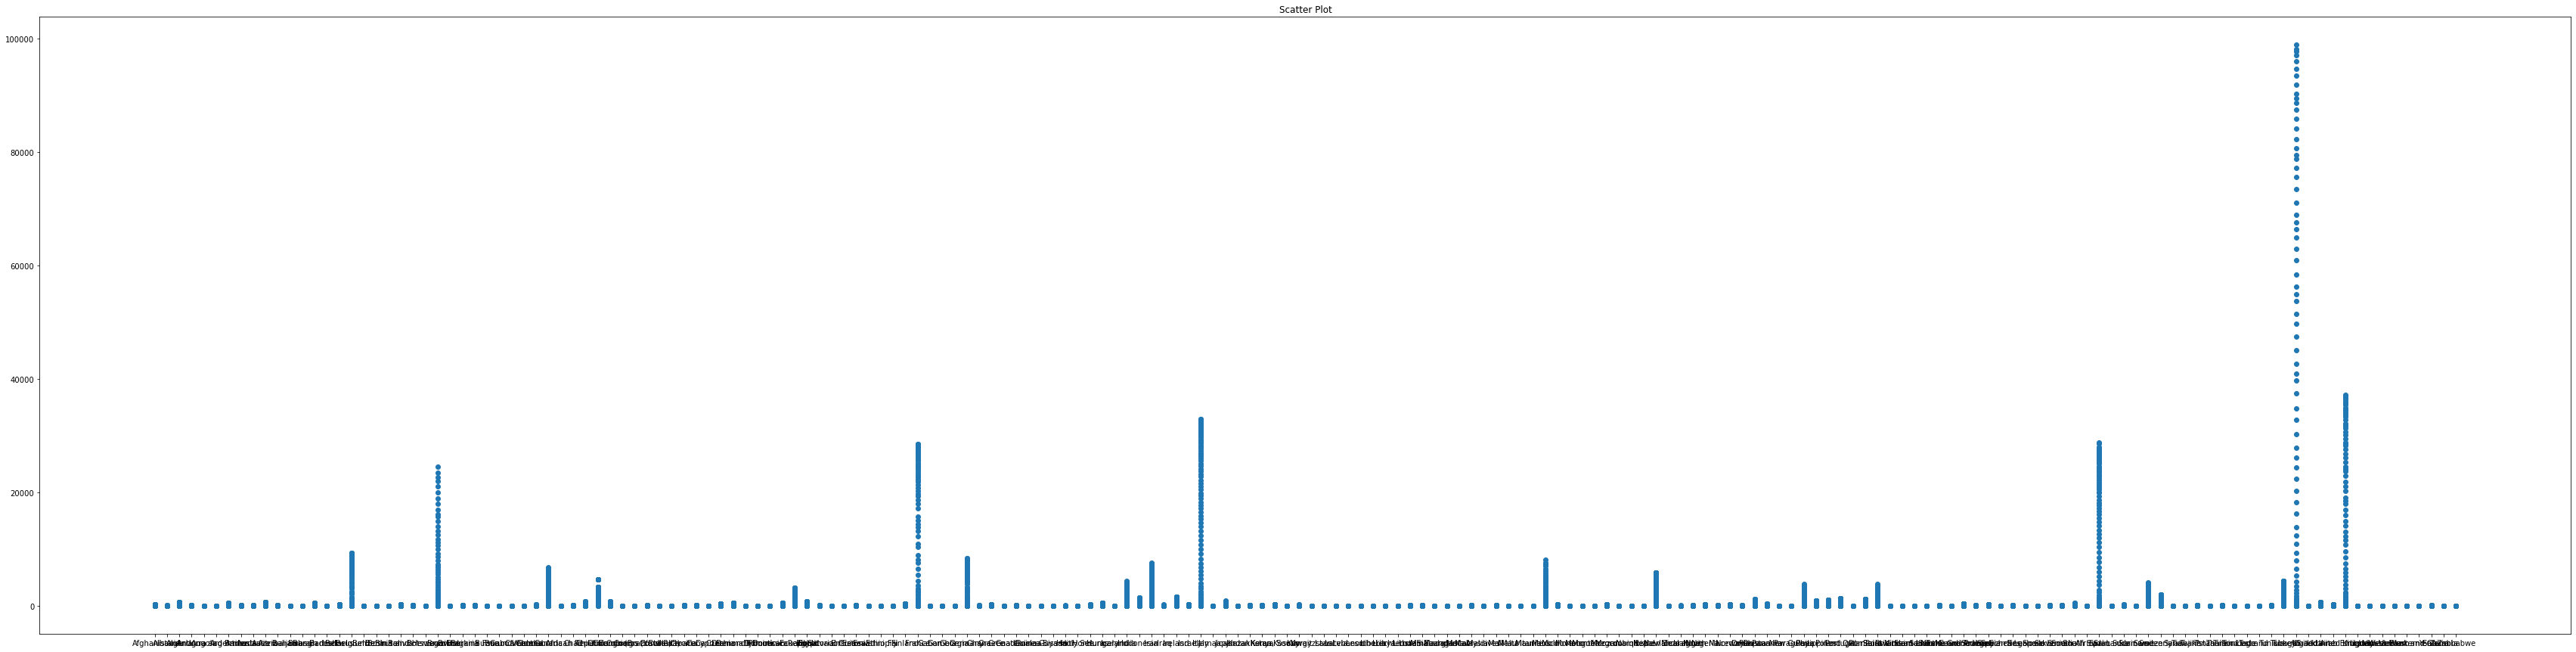

In [15]:
plt.figure(figsize=(60,15))
plt.scatter(x = df["Country"], y = df["Deaths"])
plt.title("Scatter Plot")
plt.show()

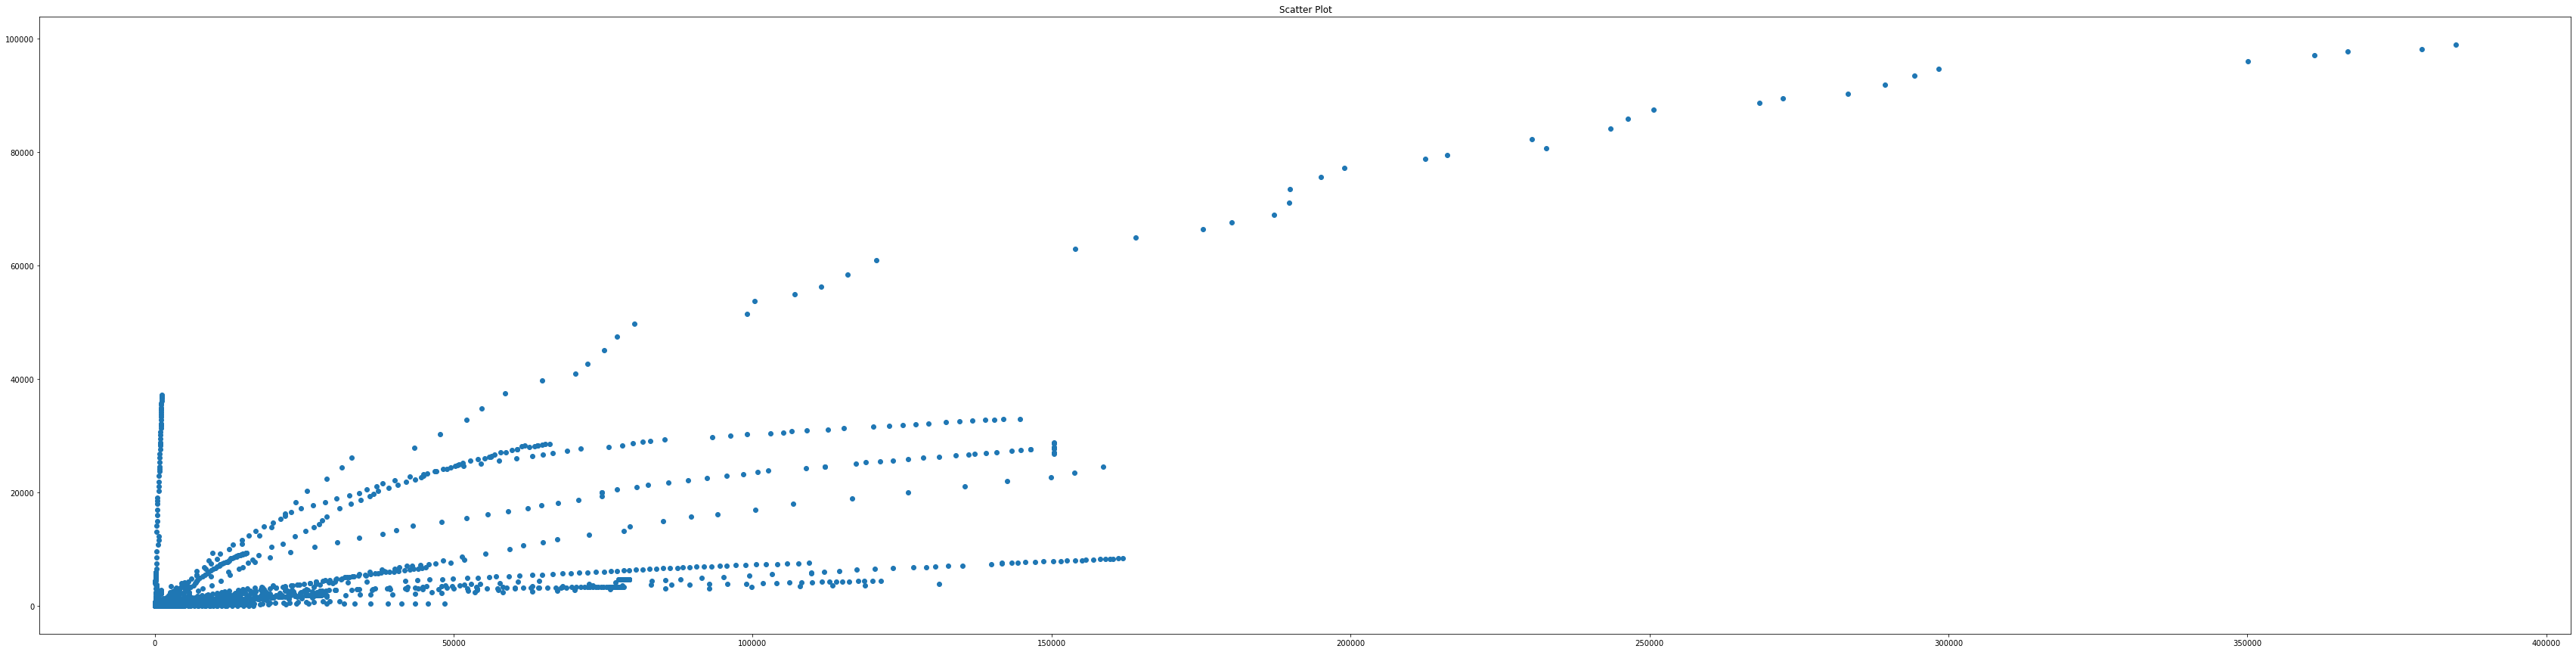

In [16]:
plt.figure(figsize=(60,15))
plt.scatter(x = df["Recovered"], y = df["Deaths"])
plt.title("Scatter Plot")
plt.show()

In [17]:
data = pd.DataFrame(df.groupby('Country').sum())

In [18]:
data.describe()

,Confirmed,Recovered,Deaths
count,1.880000e+02,1.880000e+02,1.880000e+02
mean,1.004140e+06,3.253070e+05,6.639381e+04
std,4.567753e+06,1.121162e+06,3.088152e+05
min,1.900000e+01,0.000000e+00,0.000000e+00
25%,7.594250e+03,2.169500e+03,1.582500e+02
50%,4.642850e+04,1.776400e+04,8.435000e+02
75%,3.891915e+05,1.076598e+05,8.738750e+03
max,5.709877e+07,8.428678e+06,3.221969e+06


In [19]:
datacorr = data.corr()

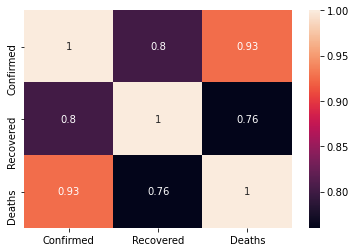

In [20]:
sns.heatmap(datacorr,annot = True)

In [21]:
x = data.drop("Deaths",axis =1)  #input attributes/parameters
y = data["Deaths"]  #target variable

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledx = sc.fit_transform(x)

In [23]:
#finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [24]:
best_rstate = 0
accu = 0
for i in range (30,200):
    x_train,x_test,y_train,y_test = train_test_split(scaledx,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    if tempaccu > accu:
        accu = tempaccu
        best_rstate = i
        
        
print(f"Best accuracy : {accu*100} found on random state :{best_rstate}")

Best accuracy : 84.81576959178703 found on random state :105


In [25]:
#creating train test split using best random state
x_train,x_test,y_train,y_test = train_test_split(scaledx,y,test_size = .25,random_state =105)

##### fitting the best model

##### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(lr,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 84.81576959178703, cross_val_score : 40.342558907266366 & differnece : 44.473210684520666


##### Random Froest regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(rf,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 71.0941786519449, cross_val_score : 58.94051062950568 & differnece : 12.15366802243922


##### SGD Regressor

In [28]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(sgd,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 83.78974338881801, cross_val_score : 43.51881787728477 & differnece : 40.27092551153324


##### KNN Regressor

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(knr,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 70.48406429888911, cross_val_score : 48.399842850677764 & differnece : 22.084221448211345


In [30]:
#we can proceed with linear Regression or SGD regressor

##### Hyper parameter tuning

In [31]:
parameters = {"max_iter":[500,700,900,110,1200,1300,1400,1500],
             "alpha":[0.0001,0.001,0.01,0.1,1,10,100],
             "penalty": ["elasticnet","l1","l2"]}

In [32]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(sgd,parameters,cv=5,scoring ='r2')  # intializing GCV
gcv.fit(x_train,y_train)
gcv.best_estimator_   #finding best estimator
gcv_pred = gcv.best_estimator_.predict(x_test)  #predicting th value using best estimator found by GridSearchCV
print("Accuracy score: ", r2_score(y_test,gcv_pred)*100)

Accuracy score:  81.72723752066824


##### Serialization

In [33]:
import joblib
joblib.dump(gcv.best_estimator_,"Coronaproject.pkl")

['Coronaproject.pkl']